In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [49]:
df = pd.read_csv('data/train.csv')

In [50]:
df.head()

,id,text,labels
0,1000008,"(a), Section 5 r/w 27 of the Arms Act. The gis...","[""Section 395 in The Indian Penal Code"", ""Sect..."
1,100009671,05.09.13 Item No. 44 Court No.17 A.B.Item No. ...,"[""Section 438 in The Indian Penal Code"", ""Sect..."
2,1000196,"JUDGMENT R.K. Chowdhry, J.For offences under t...","[""Section 120B in The Indian Penal Code"", ""Sec..."
3,100120460,"It is further alleged that present applicant, ...","[""Section 420 in The Indian Penal Code"", ""Sect..."
4,100122782,Petitioner is a medical practitioner having a ...,"[""Section 308 in The Indian Penal Code"", ""Sect..."


In [51]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      197 non-null    int64 
 1   text    197 non-null    object
 2   labels  197 non-null    object
dtypes: int64(1), object(2)
memory usage: 4.7+ KB
None


In [52]:
# Null values in each column
print(df.isnull().sum())

id        0
text      0
labels    0
dtype: int64


In [53]:
# Function to extract sections from the 'labels' column
def extract_sections(labels_str):
    return re.findall(r'"Section (\d+[A-Za-z]?) in The Indian Penal Code"', labels_str)

df['sections'] = df['labels'].apply(extract_sections)

In [54]:
section_counts = df['sections'].explode().value_counts()

In [55]:
print("\nTop 10 most common sections:")
print(section_counts.head(10))


Top 10 most common sections:
sections
34      50
323     38
302     36
506     35
307     30
420     23
498A    23
120B    21
147     19
324     17
Name: count, dtype: int64


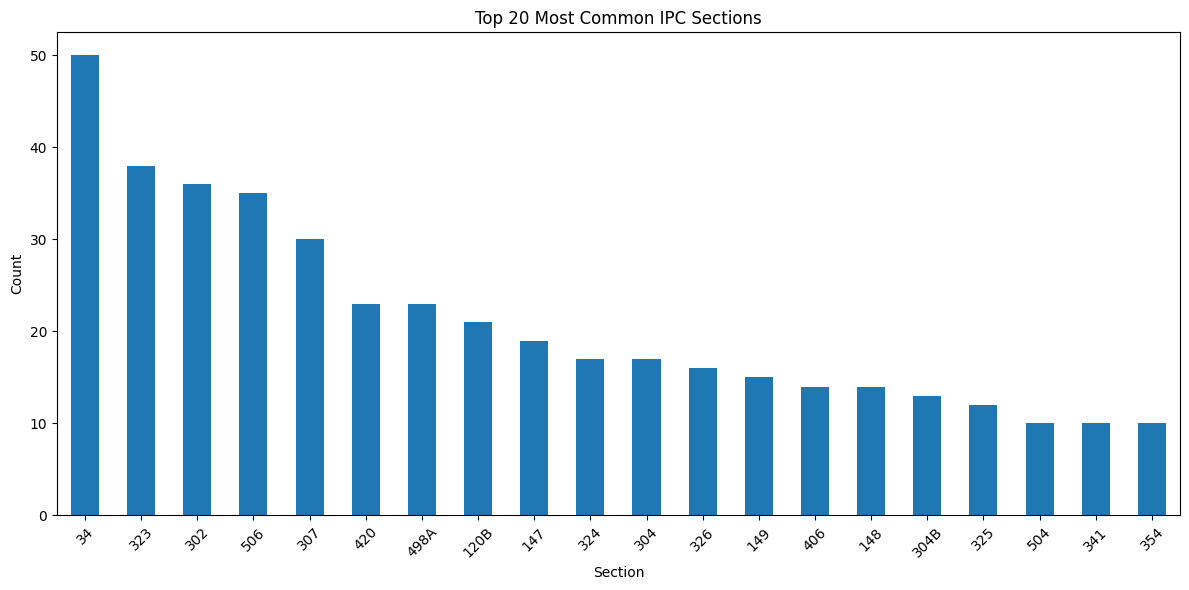

In [56]:
# Visualize the top 10 most common sections
plt.figure(figsize=(12, 6))
section_counts.head(20).plot(kind='bar')
plt.title('Top 20 Most Common IPC Sections')
plt.xlabel('Section')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

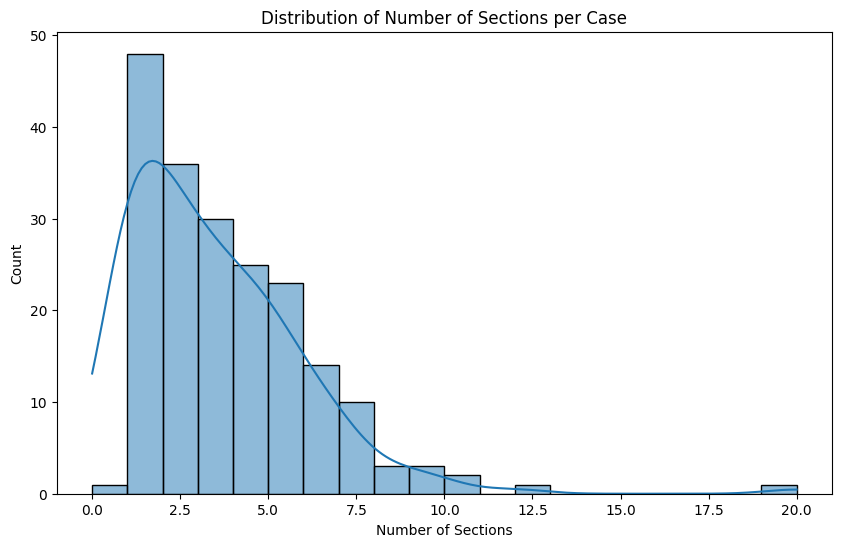

In [57]:
# Calculate the number of sections per document
df['num_sections'] = df['sections'].apply(len)

# Visualize the distribution of the number of sections per document
plt.figure(figsize=(10, 6))
sns.histplot(df['num_sections'], bins=20, kde=True)
plt.title('Distribution of Number of Sections per Case')
plt.xlabel('Number of Sections')
plt.ylabel('Count')
plt.show()


Word count statistics:
count      197.000000
mean      1054.548223
std       1548.597349
min          2.000000
25%        219.000000
50%        435.000000
75%       1261.000000
max      10324.000000
Name: word_count, dtype: float64


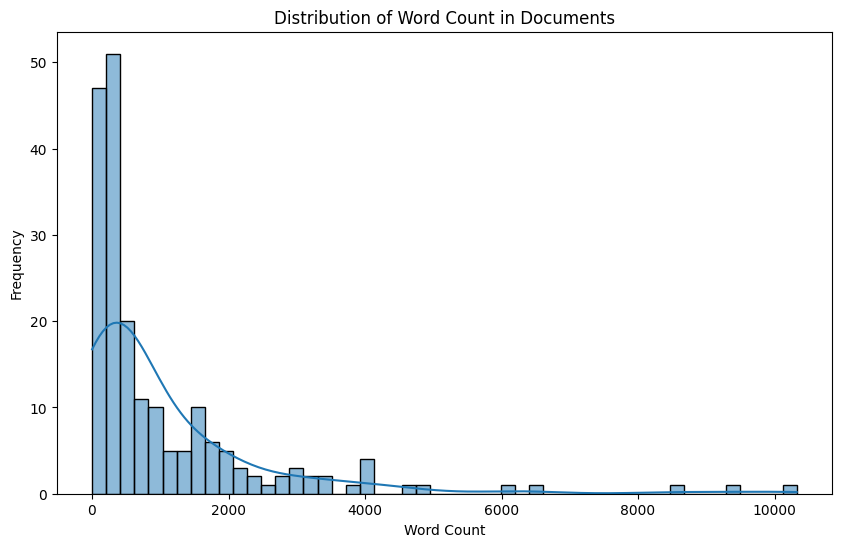

In [58]:
# Word count analysis
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))

print("\nWord count statistics:")
print(df['word_count'].describe())

# Visualize word count distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['word_count'], bins=50, kde=True)
plt.title('Distribution of Word Count in Documents')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

In [42]:
import tiktoken


def num_tokens_from_string(string: str) -> int:
    encoding = tiktoken.get_encoding("cl100k_base")
    num_tokens = len(encoding.encode(string))
    return num_tokens

In [60]:
df['num_tokens'] = df['text'].apply(lambda x: num_tokens_from_string(x))


Token count statistics:
count      197.000000
mean      1544.395939
std       2203.170548
min          4.000000
25%        334.000000
50%        631.000000
75%       1987.000000
max      14303.000000
Name: num_tokens, dtype: float64


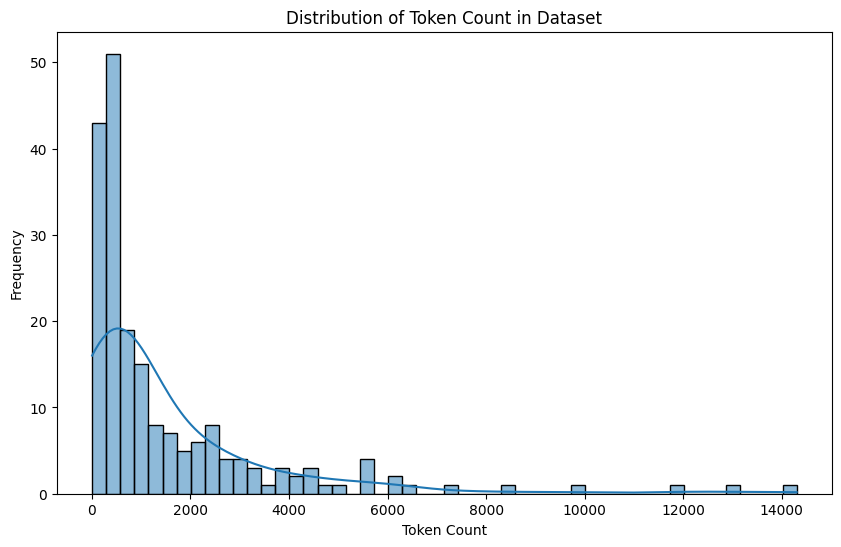

In [61]:
print("\nToken count statistics:")
print(df['num_tokens'].describe())

# Visualize word count distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['num_tokens'], bins=50, kde=True)
plt.title('Distribution of Token Count in Dataset')
plt.xlabel('Token Count')
plt.ylabel('Frequency')
plt.show()

In [62]:
avg_report_length = df['num_tokens'].mean()
min_report_length = df['num_tokens'].min()
max_report_length = df['num_tokens'].max()
report_length_sum = df['num_tokens'].sum()

In [66]:
price_model = 0.0030
model="gpt-3.5-turbo"
price_per_epoch = (report_length_sum / 1000) * price_model 
print(f"Fine-tuning of {model} costs ~ ${price_per_epoch:.2f} per epoch")
AVG_EPOCHS = 3
print(f"Avg cost assuming {AVG_EPOCHS} epochs: ${price_per_epoch*AVG_EPOCHS:.2f}")

Fine-tuning of gpt-3.5-turbo costs ~ $0.91 per epoch
Avg cost assuming 3 epochs: $2.74
